## Pair Programming - Regresión logística 3 y 4

### Ajuste y Métricas

---

In [1]:
# Tratamiento de los datos
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Testing
from sklearn.model_selection import train_test_split

#  Modelado, matriz de confusión y métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('../archivos/travel_balanceado_sin_dupl.csv', index_col=0)
df.head()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
0,12,108.9,65.34,4,5,8,1.310481,2.643544,0,0,...,0,0,0,1,0,1,0,0,1,0
1,7,56.5,14.13,6,4,8,0.271790,0.166822,0,0,...,0,0,1,0,0,1,1,0,0,0
2,14,24.0,0.00,6,5,4,-0.372436,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0
3,14,25.0,0.00,6,6,6,-0.352614,-0.516562,0,0,...,0,0,0,1,0,1,0,0,1,0
4,12,0.0,23.76,6,6,4,-0.848173,0.632567,0,0,...,0,0,0,1,0,1,0,0,1,0


In [4]:
df_2 = pd.read_csv('../archivos/travel_enco_stand_sin_balanceo.csv', index_col=0)
df_2.head()

,product_name,claim,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
1,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
2,12,0,-49.5,29.70,4,5,8,-1.829379,0.919850,0,...,0,0,0,0,1,0,1,0,0,1
3,12,0,-39.6,23.76,4,5,8,-1.633138,0.632567,0,...,0,0,0,0,1,0,1,0,0,1
4,12,0,-19.8,11.88,5,6,8,-1.240655,0.058003,0,...,0,0,0,0,1,0,1,0,0,1


Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

### 1. Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta BALANCEADA

In [6]:
df_stand_bal = df.drop(['net_sales', 'commision_(in_value)'], axis= 1)

In [7]:
# separamos los datos en X e y

X1 = df_stand_bal.drop("claim", axis = 1)
y1 = df_stand_bal["claim"]

In [8]:
# comprobamos las variables predictoras
X1.head()

,product_name,continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,agency_C2B,agency_CBH,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,12,4,5,8,1.310481,2.643544,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,7,6,4,8,0.271790,0.166822,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,14,6,5,4,-0.372436,-0.516562,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,14,6,6,6,-0.352614,-0.516562,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12,6,6,4,-0.848173,0.632567,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [9]:
# comprobamos la variable respuesta

y1.head()

0    0
1    0
2    0
3    0
4    0
Name: claim, dtype: int64

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

### Ajuste de nuestro modelo

In [11]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [12]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
51210,1,0,Train
35601,0,1,Train
47756,1,1,Train
4316,0,0,Train
48482,1,1,Train


### Matriz de Confusión

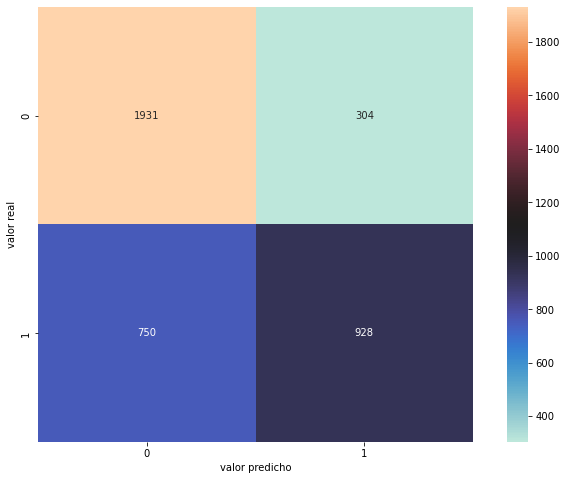

In [13]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

➡️ **_Conclusiones:_**

0: No reclaman el seguro

1: Si reclaman

- VP: El número 1931, corresponde al número de personas que no reclaman y si hemos predicho.
- VN: El número 928, corresponde al número de personas que si reclaman y si hemos predicho.
- FN: El número 750, corresponde al número de personas que si han reclamado y no hemos predicho.
- FP: El número 304, corresponde al número de personas que no reclaman y no hemos predicho. 




In [14]:
# Sacamos las métricas

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [15]:
resultados_logistic_stand_bal = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Stan_Bal")
resultados_logistic_stand_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.730641,0.753247,0.553039,0.637801,0.431306,test,Regresión logistica Stan_Bal
1,0.718612,0.740592,0.541575,0.625638,0.408807,train,Regresión logistica Stan_Bal


➡️ **_Conclusiones:_**

Vemos que tenemos: 
- un accuracy y precision altos.
- un f1 considerablemente alto aunque mejorable.
- un kappa que nos indica que tenemos más de la mitad de prediciones aleatorias.

Nos interesaría subir el recall ya que en nuestro caso nos interesa tener más posibilidad de error con los FN, las personas que no reclaman y no hemos predicho.



### 2. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta SIN BALANCEAR

In [16]:
df_sin_stand_sin_bal = df_2.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [17]:
# separamos los datos en X e y

X2 = df_sin_stand_sin_bal.drop("claim", axis = 1)
y2 = df_sin_stand_sin_bal["claim"]

In [18]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [19]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta2 = LogisticRegression(n_jobs=-1, max_iter = 2000)

# ajustamos el modelo
log_reg_esta2.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta2 = log_reg_esta2.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta2 = log_reg_esta2.predict(x_test2)

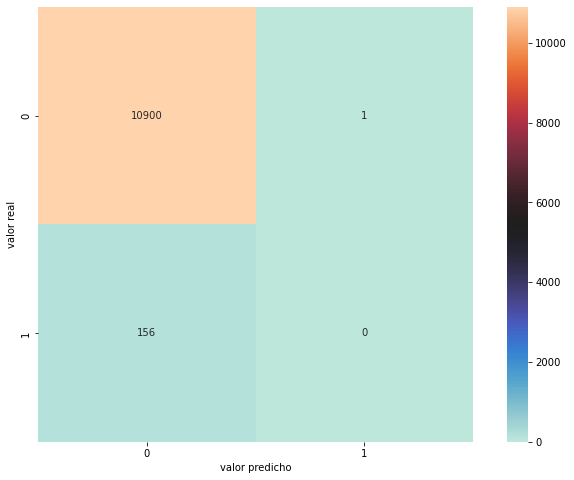

In [20]:
# Matriz de confusión
mat_lr_esta2 = confusion_matrix(y_test2, y_pred_test_esta2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta2, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [21]:
results_logistic_sin_stand_bal = metricas(y_test2, y_pred_test_esta2, y_train2, y_pred_train_esta2, "Regresión logistica Sin Stan-Bal")
results_logistic_sin_stand_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.985801,0.0,0.0,0.0,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.0,0.0,0.0,-0.000135,train,Regresión logistica Sin Stan-Bal


### 3. Módelo con las variables predictoras SIN ESTANDARIZAR y la variable respuesta BALANCEADA

In [22]:
df_sin_stand_con_bal = df.drop(['net_sales_stand', 'commision_(in_value)_stand'], axis= 1)

In [23]:
# separamos los datos en X e y

X3 = df_sin_stand_con_bal.drop("claim", axis = 1)
y3 = df_sin_stand_con_bal["claim"]

In [24]:
# separamos en train y test
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [25]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta3 = LogisticRegression(n_jobs=-1, max_iter = 3000)

# ajustamos el modelo
log_reg_esta3.fit(x_train3,y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta3 = log_reg_esta3.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta3 = log_reg_esta3.predict(x_test3)

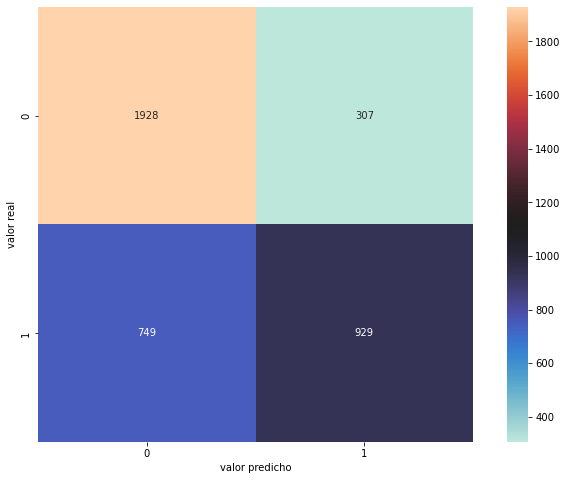

In [26]:
# Matriz de confusión
mat_lr_esta3 = confusion_matrix(y_test3, y_pred_test_esta3)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta3, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [27]:
results_logistic_sin_stand_con_bal = metricas(y_test3, y_pred_test_esta3, y_train3, y_pred_train_esta3, "Regresión logistica Sin Stan Con Bal")
results_logistic_sin_stand_con_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.730130,0.751618,0.553635,0.637612,0.430402,test,Regresión logistica Sin Stan Con Bal
1,0.718421,0.739855,0.542016,0.625669,0.408498,train,Regresión logistica Sin Stan Con Bal


### 4. Modelo con las variables predictoras ESTANDARIZADAS y la variable respuesta SIN BALANCEAR


In [30]:
df_stand_sin_bal = df_2.drop(['net_sales', 'commision_(in_value)'], axis= 1)

In [31]:
# separamos los datos en X e y

X4 = df_stand_sin_bal.drop("claim", axis = 1)
y4 = df_stand_sin_bal["claim"]

In [32]:
# separamos en train y test
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

In [33]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta4 = LogisticRegression(n_jobs=-1, max_iter = 3000)

# ajustamos el modelo
log_reg_esta4.fit(x_train4,y_train4)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta4 = log_reg_esta4.predict(x_train4)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta4 = log_reg_esta4.predict(x_test4)

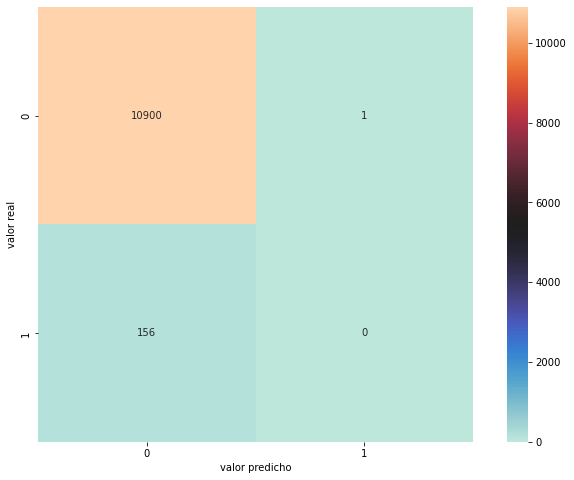

In [34]:
# Matriz de confusión
mat_lr_esta4 = confusion_matrix(y_test4, y_pred_test_esta4)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta4, square=True, annot=True, fmt="d", cmap = "icefire")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [35]:
results_logistic_con_stand_sin_bal = metricas(y_test4, y_pred_test_esta4, y_train4, y_pred_train_esta4, "Regresión logistica Con Stan Sin Bal")
results_logistic_con_stand_sin_bal

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.985801,0.0,0.0,0.0,-0.000180,test,Regresión logistica Con Stan Sin Bal
1,0.982635,0.0,0.0,0.0,-0.000135,train,Regresión logistica Con Stan Sin Bal


### 5. Unimos todas las métricas

In [36]:
# Unimos en un dataframe todos los resultados

resultados_todo = pd.concat([resultados_logistic_stand_bal, results_logistic_sin_stand_bal, results_logistic_sin_stand_con_bal, results_logistic_con_stand_sin_bal], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.730641,0.753247,0.553039,0.637801,0.431306,test,Regresión logistica Stan_Bal
1,0.718612,0.740592,0.541575,0.625638,0.408807,train,Regresión logistica Stan_Bal
0,0.985801,0.000000,0.000000,0.000000,-0.000180,test,Regresión logistica Sin Stan-Bal
1,0.982635,0.000000,0.000000,0.000000,-0.000135,train,Regresión logistica Sin Stan-Bal
0,0.730130,0.751618,0.553635,0.637612,0.430402,test,Regresión logistica Sin Stan Con Bal
1,0.718421,0.739855,0.542016,0.625669,0.408498,train,Regresión logistica Sin Stan Con Bal
0,0.985801,0.000000,0.000000,0.000000,-0.000180,test,Regresión logistica Con Stan Sin Bal
1,0.982635,0.000000,0.000000,0.000000,-0.000135,train,Regresión logistica Con Stan Sin Bal


➡️ **_Conclusiones:_**

- El segundo caso y cuarto casos; sin estandarizar y sin balancear, el primero y con estandarización y sin balanceo, muy similares y fracaso absoluto.

- El primer y tercer modelo vemos que son los más acertados, dentro de que no son muy precisos y tienen un kappa de 0.43.

- Estos modelos, el primero y el tercero, son los que están con la variable respuesta balanceada y las variables predictoras numéricas están en uno de los casos estandarizadas y en el otro sin estandarizar. Aunque dan mejor resultados no son buenos modelos ya que su Kappa es bastante bajo.

In [29]:
resultados_todo.to_csv("../archivos/resultados_travel_logistica.csv")